# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
main_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{main_url}appid={api_key}&units{units}&q="
lat_lst = []
lng_lst = []
cloudiness_lst = []
date_lst = []
humidity_lst = []
max_temp_lst = []
wind_speed_lst = []
country_lst = []
city_found = []
conteo = 0
setc = 1

print("Beginning of Data Retrieval")

for i in cities:  
    try:
        response = requests.get(url + i)
        response_json = response.json()
        cloudiness_lst.append(response_json['clouds']['all'])
        country_lst.append(response_json['sys']['country'])
        date_lst.append(response_json['dt'])
        humidity_lst.append(response_json['main']['humidity'])
        lat_lst.append(response_json['coord']['lat'])
        lng_lst.append(response_json['coord']['lon'])
        max_temp_lst.append(response_json['main']['temp_max'])
        wind_speed_lst.append(response_json['wind']['speed'])
        
        if conteo > 49:
            conteo = 0
            setc = setc + 1
            city_found.append(i)
        else:
            conteo = conteo + 1
            setc = setc
            city_found.append(i)
        print(f"Processing Record {conteo} of Set {setc} | {i}")
        
    except Exception:
        print("City not found. Skipping...")

print("Data Retrieval Complete")

Beginning of Data Retrieval
Processing Record 1 of Set 1 | ko samui
Processing Record 2 of Set 1 | lagoa
Processing Record 3 of Set 1 | cartagena del chaira
City not found. Skipping...
Processing Record 4 of Set 1 | hilton head island
Processing Record 5 of Set 1 | vyborg
Processing Record 6 of Set 1 | port blair
Processing Record 7 of Set 1 | sabaudia
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | ponta delgada
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | emba
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | saint-augustin
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | hithadhoo
Processing Rec

City not found. Skipping...
Processing Record 34 of Set 4 | malakal
Processing Record 35 of Set 4 | lengshuijiang
City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 4 | ternate
Processing Record 37 of Set 4 | hovd
Processing Record 38 of Set 4 | payo
Processing Record 39 of Set 4 | roura
Processing Record 40 of Set 4 | tuy hoa
Processing Record 41 of Set 4 | macau
City not found. Skipping...
Processing Record 42 of Set 4 | nantucket
Processing Record 43 of Set 4 | mehamn
City not found. Skipping...
Processing Record 44 of Set 4 | dicabisagan
Processing Record 45 of Set 4 | jhinjhak
Processing Record 46 of Set 4 | oktyabrskiy
Processing Record 47 of Set 4 | gondar
Processing Record 48 of Set 4 | hukuntsi
Processing Record 49 of Set 4 | saint-donat-de-montcalm
Processing Record 50 of Set 4 | georgiyevka
Processing Record 0 of Set 5 | kodiak
Processing Record 1 of Set 5 | sault sainte marie
Processing Record 2 of Set 5 | howard springs
Processing Record 3 

Processing Record 15 of Set 8 | nago
Processing Record 16 of Set 8 | bonfim
Processing Record 17 of Set 8 | khetia
Processing Record 18 of Set 8 | jutai
Processing Record 19 of Set 8 | anage
Processing Record 20 of Set 8 | pyshma
City not found. Skipping...
Processing Record 21 of Set 8 | leningradskiy
Processing Record 22 of Set 8 | banda aceh
Processing Record 23 of Set 8 | broome
Processing Record 24 of Set 8 | demirci
Processing Record 25 of Set 8 | sawtell
Processing Record 26 of Set 8 | sibolga
Processing Record 27 of Set 8 | san jeronimo
Processing Record 28 of Set 8 | glinka
City not found. Skipping...
Processing Record 29 of Set 8 | neyshabur
Processing Record 30 of Set 8 | ashqelon
Processing Record 31 of Set 8 | murupara
City not found. Skipping...
Processing Record 32 of Set 8 | maine-soroa
Processing Record 33 of Set 8 | tilichiki
Processing Record 34 of Set 8 | rudnichnyy
Processing Record 35 of Set 8 | severodvinsk
City not found. Skipping...
Processing Record 36 of Set 

Processing Record 48 of Set 11 | pangnirtung
City not found. Skipping...
Processing Record 49 of Set 11 | guasdualito
Processing Record 50 of Set 11 | noumea
Processing Record 0 of Set 12 | snasa
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
ciudad_df = pd.DataFrame(city_found)
ciudad_df.columns = ['City']

ciudad_df['Country'] = country_lst
ciudad_df['Date'] = date_lst
ciudad_df['Cloudiness'] = cloudiness_lst
ciudad_df['Humidity'] = humidity_lst
ciudad_df['Latitude'] = lat_lst
ciudad_df['Longitude'] = lng_lst
ciudad_df['Max Temp'] = max_temp_lst
ciudad_df['Wind Speed'] = wind_speed_lst

ciudad_df.to_csv(output_data_file)
ciudad_df.count(axis = 0)

City          561
Country       561
Date          561
Cloudiness    561
Humidity      561
Latitude      561
Longitude     561
Max Temp      561
Wind Speed    561
dtype: int64

In [5]:
ciudad_df.head()

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,ko samui,TH,1581468178,20,74,9.54,99.94,301.15,5.10
1,lagoa,PT,1581468209,68,81,39.05,-27.98,290.05,6.31
2,cartagena del chaira,CO,1581468209,67,48,1.33,-74.84,301.22,1.49
3,hilton head island,US,1581468209,1,93,32.22,-80.75,295.15,3.10
4,vyborg,RU,1581468209,90,93,60.71,28.75,274.26,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

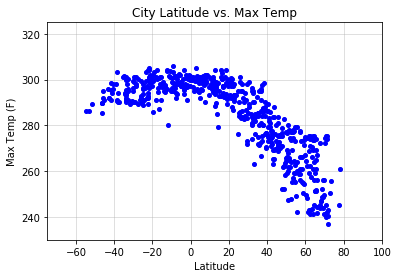

In [6]:
fig, ax = plt.subplots()
ax.errorbar(lat_lst, max_temp_lst, fmt="o", c ="blue", ms = 4, capthick = 1, capsize = 2)

ax.set_xlim(-75,100)
ax.set_ylim(230,325)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp (F)")
ax.grid(alpha = .5)

plt.title("City Latitude vs. Max Temp")
plt.savefig("City Latitude vs. Max Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

In [7]:
fig, ax = plt.subplots()
ax.errorbar(lat_lst, humidity_lst, fmt="o", c ="blue", ms = 4, capthick = 1, capsize = 2)

ax.set_xlim(-75,85)
ax.set_ylim(0,110)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%)")
ax.grid(alpha = .5
        
plt.title("City Latitude vs. Humidity (%)")
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

SyntaxError: invalid syntax (<ipython-input-7-010393eb52b7>, line 10)

#### Latitude vs. Cloudiness Plot

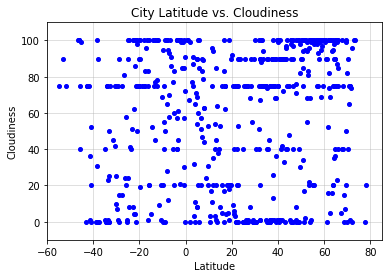

In [8]:
fig, ax = plt.subplots()
ax.errorbar(lat_lst, cloudiness_lst, fmt="o", c ="blue", ms = 4, capthick = 1, capsize = 2)

ax.set_xlim(-60,85)
ax.set_ylim(-10,110)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")
ax.grid(alpha = .5)

plt.title("City Latitude vs. Cloudiness")
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

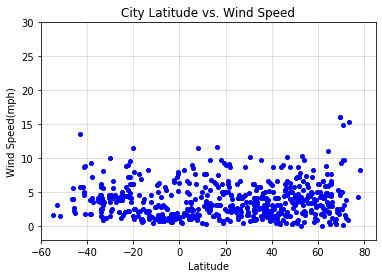

In [9]:
fig, ax = plt.subplots()
ax.errorbar(lat_lst, wind_speed_lst, fmt="o", c ="blue", ms = 4, capthick = 1, capsize = 2)

ax.set_xlim(-60,85)
ax.set_ylim(-2,30)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed(mph)")
ax.grid(alpha = .5)

plt.title("City Latitude vs. Wind Speed")
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()